C:\Users\tejas\AppData\Local\Temp\ipykernel_32676\961529573.py:37: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  legend_fig.tight_layout()


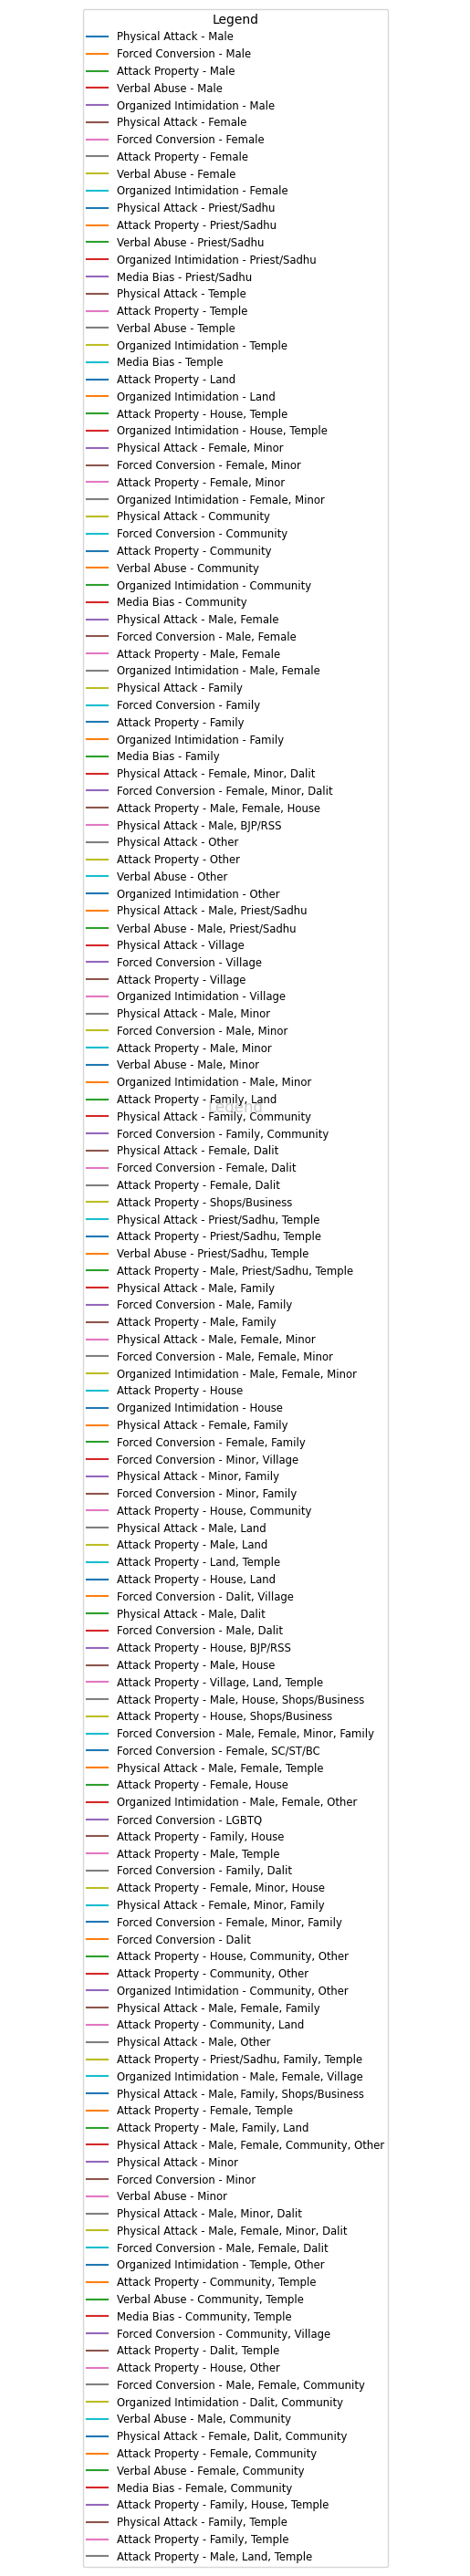

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from Excel (replace path with your actual file location)
df = pd.read_excel("C:/Users/tejas/Downloads/incidents-details-data (1).xlsx")

# Convert 'Date of Incident' column to datetime format
df['Date of Incident'] = pd.to_datetime(df['Date of Incident'], format='%a, %m/%d/%Y - %H:%M')

# Prepare data (assuming 'Date of Incident', 'Incident Type', and 'Victim' columns exist)
df_agg = df.groupby(['Date of Incident', 'Incident Type', 'Victim']).size().reset_index(name='Count')

# Get top 20 incident types based on count
top_incident_types = df_agg.groupby('Incident Type')['Count'].sum().nlargest(20).index

# Filter data for top incident types
df_filtered = df_agg[df_agg['Incident Type'].isin(top_incident_types)]

# Create separate plot for legend
legend_fig, legend_ax = plt.subplots()
legend_ax.axis('off')

# Create legend only
legend_handles = []
victim_categories = df['Victim'].unique()  # Get unique victim categories
for victim in victim_categories:
    df_victim = df_filtered[df_filtered['Victim'] == victim]
    for incident_type in top_incident_types:
        df_plot = df_victim[df_victim['Incident Type'] == incident_type]
        if not df_plot.empty:
            line, = legend_ax.plot([], [], label=f'{incident_type} - {victim}')
            legend_handles.append(line)

# Create the legend
legend_ax.legend(handles=legend_handles, loc='center', fontsize='small', title='Legend')
legend_ax.set_title('Legend')
legend_fig.tight_layout()

# Show the legend
plt.show()


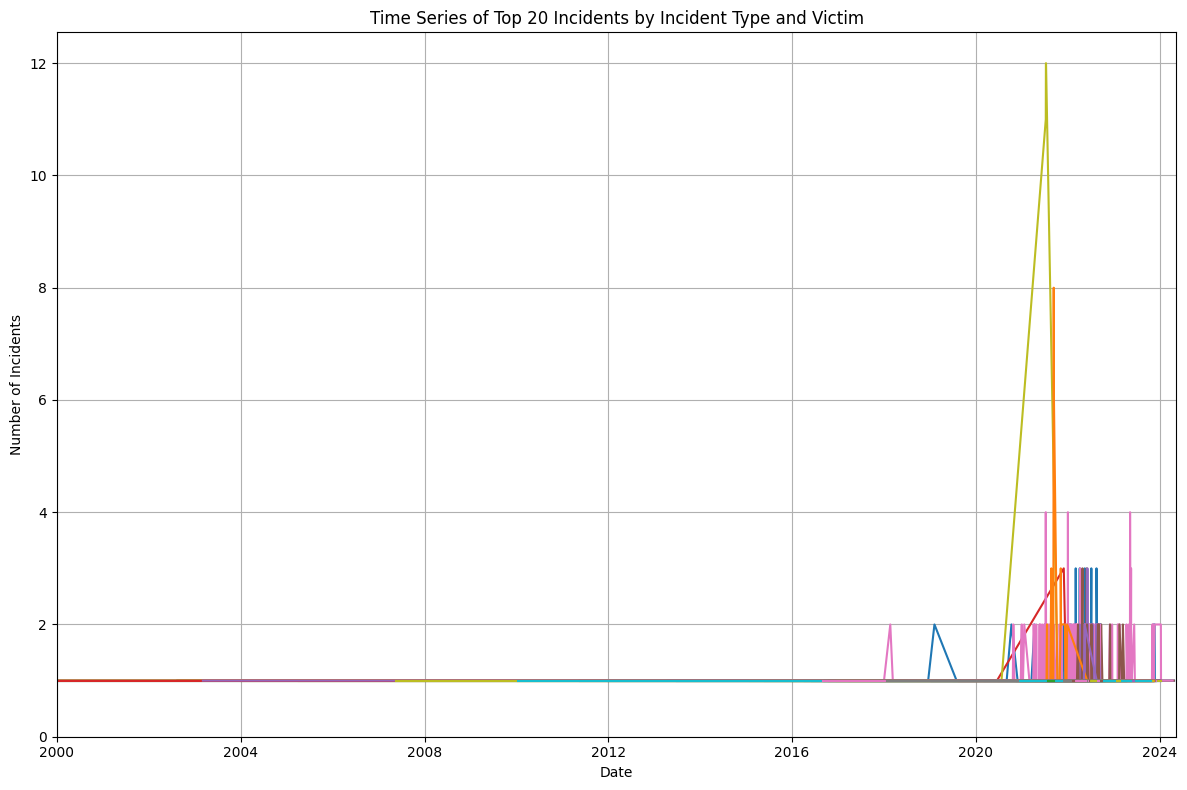

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from Excel (replace path with your actual file location)
df = pd.read_excel("C:/Users/tejas/Downloads/incidents-details-data (1).xlsx")

# Convert 'Date of Incident' column to datetime format
df['Date of Incident'] = pd.to_datetime(df['Date of Incident'], format='%a, %m/%d/%Y - %H:%M')

# Prepare data (assuming 'Date of Incident', 'Incident Type', and 'Victim' columns exist)
df_agg = df.groupby(['Date of Incident', 'Incident Type', 'Victim']).size().reset_index(name='Count')

# Get top 20 incident types based on count
top_incident_types = df_agg.groupby('Incident Type')['Count'].sum().nlargest(20).index

# Filter data for top incident types
df_filtered = df_agg[df_agg['Incident Type'].isin(top_incident_types)]

# Create separate plots for each victim category
plt.figure(figsize=(12, 8))
victim_categories = df['Victim'].unique()  # Get unique victim categories
for victim in victim_categories:
    df_victim = df_filtered[df_filtered['Victim'] == victim]
    for incident_type in top_incident_types:
        df_plot = df_victim[df_victim['Incident Type'] == incident_type]
        if not df_plot.empty:
            plt.plot(df_plot['Date of Incident'], df_plot['Count'], label=f'{incident_type} - {victim}')

# Customize plot
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.title('Time Series of Top 20 Incidents by Incident Type and Victim')
plt.ylim(0)  # Ensure y-axis starts from 0
plt.xlim(pd.Timestamp('2000-01-01'), pd.Timestamp.now())  # Set x-axis limits from 2000 to current date

plt.grid(True)
plt.tight_layout()
plt.show()


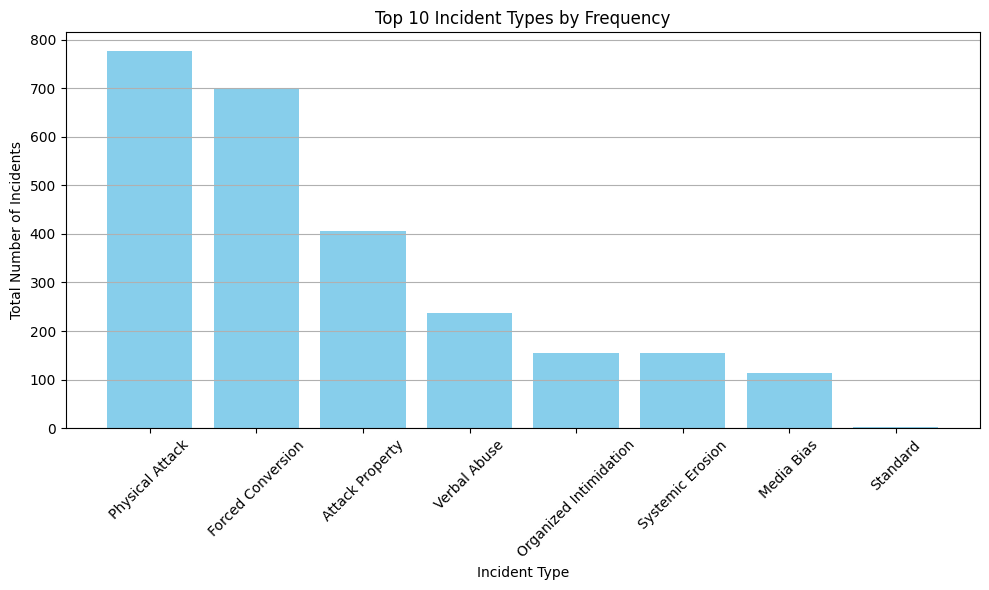

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from Excel (replace path with your actual file location)
df = pd.read_excel("C:/Users/tejas/Downloads/incidents-details-data (1).xlsx")

# Prepare data (assuming 'Date of Incident' and 'Incident Type' columns exist)
df_agg = df.groupby('Incident Type').size().nlargest(10).reset_index(name='Count')

# Bar chart for incident types
plt.figure(figsize=(10, 6))
plt.bar(df_agg['Incident Type'], df_agg['Count'], color='skyblue')
plt.xlabel('Incident Type')
plt.ylabel('Total Number of Incidents')
plt.title('Top 10 Incident Types by Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


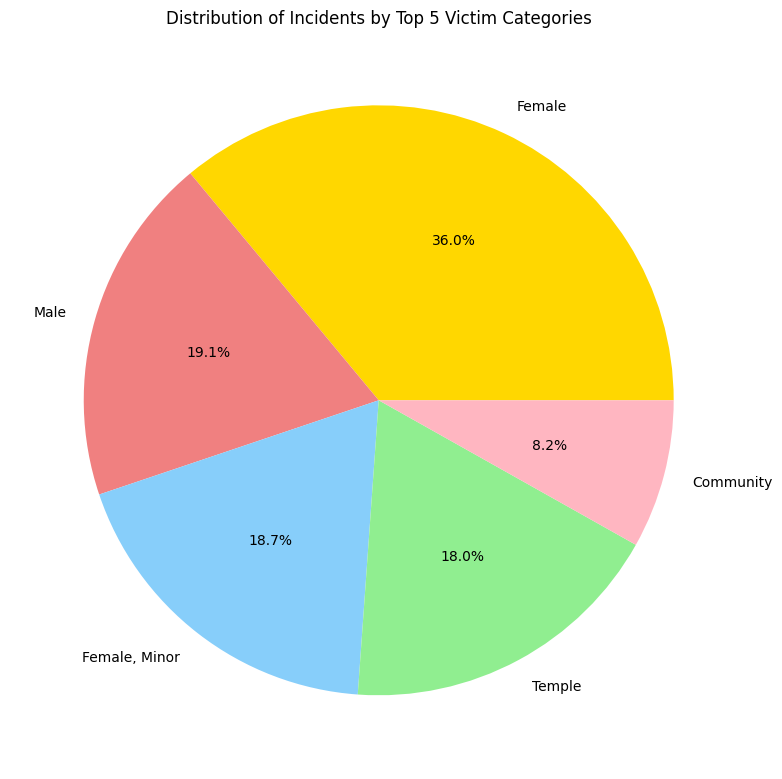

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from Excel (replace path with your actual file location)
df = pd.read_excel("C:/Users/tejas/Downloads/incidents-details-data (1).xlsx")

# Prepare data (assuming 'Date of Incident' and 'Victim' columns exist)
df_agg = df.groupby('Victim').size().nlargest(5).reset_index(name='Count')

# Pie chart for victim categories
plt.figure(figsize=(8, 8))
plt.pie(df_agg['Count'], labels=df_agg['Victim'], autopct='%1.1f%%', colors=['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'lightpink'])
plt.title('Distribution of Incidents by Top 5 Victim Categories')
plt.ylabel('')
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

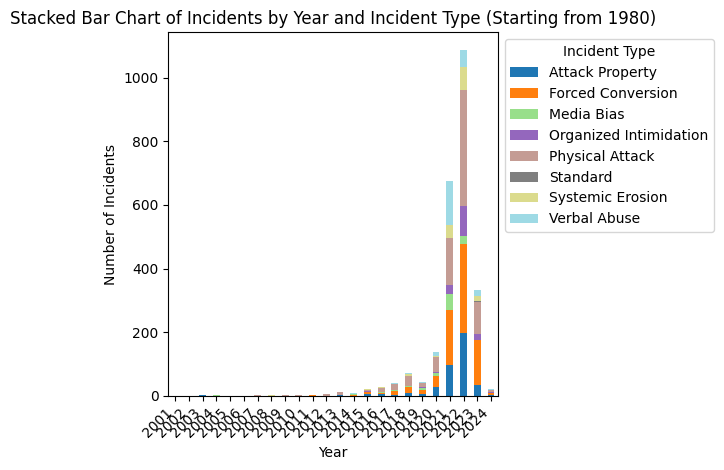

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from Excel (replace path with your actual file location)
df = pd.read_excel("C:/Users/tejas/Downloads/incidents-details-data (1).xlsx")

# Convert 'Date of Incident' column to datetime format
df['Date of Incident'] = pd.to_datetime(df['Date of Incident'], format='%a, %m/%d/%Y - %H:%M')

# Filter data for years starting from 1980
df_filtered = df[df['Date of Incident'].dt.year >= 2000]

# Prepare data (assuming 'Date of Incident' and 'Incident Type' columns exist)
df_agg = df_filtered.groupby(['Date of Incident', 'Incident Type']).size().reset_index(name='Count')

# Create stacked bar chart for incidents over time
plt.figure(figsize=(12, 6))
df_agg['Year'] = df_agg['Date of Incident'].dt.year
df_pivot = df_agg.pivot_table(index='Year', columns='Incident Type', values='Count', aggfunc='sum', fill_value=0)
ax = df_pivot.plot(kind='bar', stacked=True, cmap='tab20')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Stacked Bar Chart of Incidents by Year and Incident Type (Starting from 1980)')
plt.legend(title='Incident Type', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels
plt.tight_layout()
plt.show()
